In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from PIL.Image import open
import random
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/csv/Brain Tumor.csv")

In [3]:
df.shape

(3762, 15)

In [4]:
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


### EDA & Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [6]:
df.isnull().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

In [7]:
df.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


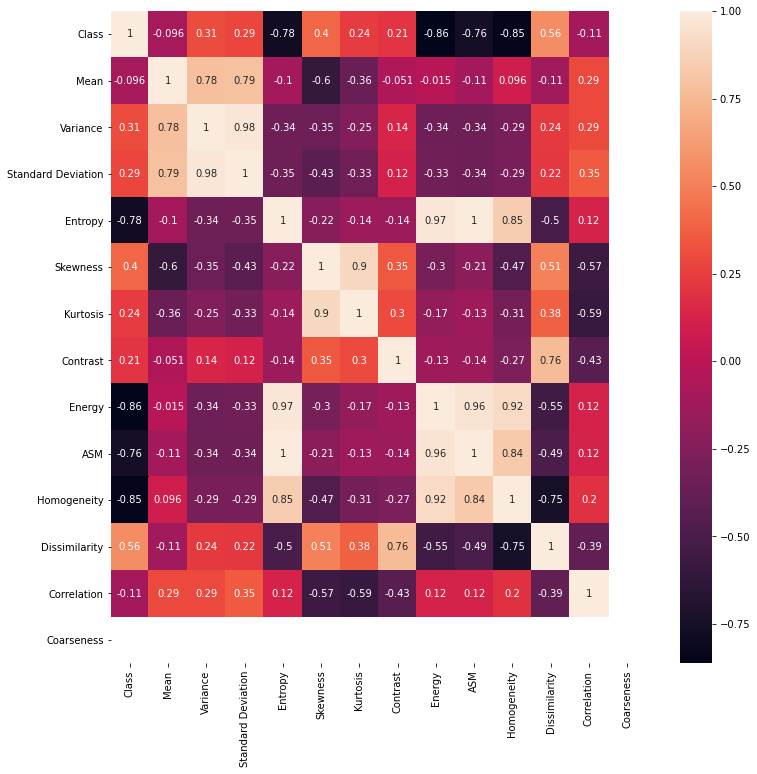

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


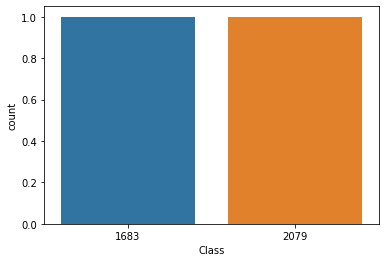

In [9]:
sns.countplot(df["Class"].value_counts())

 Plot few samples

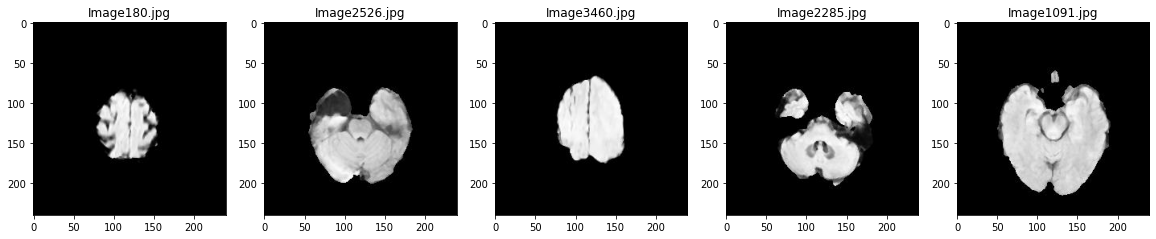

In [10]:
plt.figure(figsize=(20,20))
test_folder="/content/drive/MyDrive/Colab Notebooks/kaggle/csv/Brain Tumor" 
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [11]:
data = pd.DataFrame()

In [12]:
data["Image"] = df["Image"]
data["Class"] = df["Class"]

In [13]:
# Get image paths to build a dictionary for data generators
path_list = []
base_path = '/content/drive/MyDrive/Colab Notebooks/kaggle/csv/Brain Tumor'
for entry in os.listdir(base_path):
    path_list.append(os.path.join(base_path, entry))

In [14]:
# Create path dictionary and map it to data['paths']
paths_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
data['Path'] = df['Image'].map(paths_dict.get)
data.head()

,Image,Class,Path
0,Image1,0,/content/drive/MyDrive/Colab Notebooks/kaggle/...
1,Image2,0,/content/drive/MyDrive/Colab Notebooks/kaggle/...
2,Image3,1,/content/drive/MyDrive/Colab Notebooks/kaggle/...
3,Image4,1,/content/drive/MyDrive/Colab Notebooks/kaggle/...
4,Image5,0,/content/drive/MyDrive/Colab Notebooks/kaggle/...


In [15]:
# converting an image 


In [ ]:
data['Pixels'] = data['Path'].map(lambda x :np.asarray(open(x).resize((224,224))))

In [ ]:
data.head()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

Preprocessing

In [ ]:
image_list = []
for i in range(len(data)):
    brain_image = data["Pixels"][i].astype(np.float32)  # load img
    brain_image = brain_image/ 255.0
    image_list.append(brain_image)

In [ ]:
# convert image list to single array
# feature
X = np.array(image_list)

In [ ]:
X.shape

In [ ]:
# class label

In [ ]:
y = np.array(data.Class)

In [ ]:
print(y)

Splitting the dataset to training set(70%) and testing set (30%)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y
                                                 ,test_size=0.3
                                                ,random_state=0)

## model

tf.keras.applications.VGG19

[VGg19_docs](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG19)

Deep Convolutional Networks for Large-Scale Image Recognition 

In [ ]:
model1 = Sequential(
    tf.keras.applications.VGG19(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=(224, 224, 3), pooling=None, classes=1000,
    classifier_activation='softmax'
)
)

In [ ]:
model1.add(Dense(224,activation="relu"))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(4,activation='relu'))

model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.summary()

In [ ]:
model1.compile(loss = 'binary_crossentropy',optimizer='adam')

In [ ]:
history  = model1.fit(X_train,y_train,epochs=30,batch_size=20,validation_data=(X_train,y_train))

In [ ]:
fig , ax = plt.subplots(figsize=(8,8))

plt.plot(base_model_history.history['loss'], label='loss')
plt.plot(base_model_history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

In [ ]:
y_pred_base = base_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_base))

In [ ]:
mat = confusion_matrix(y_test,y_pred_base)
sns.heatmap(mat,annot=True,fmt='d')